<a href="https://colab.research.google.com/github/Polux79/Ingenieria-ambiental/blob/main/Procesos_transitorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

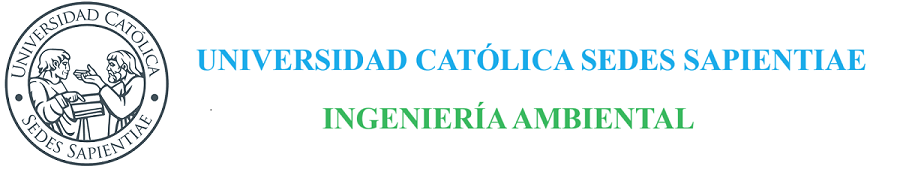

Autor:

[Henry Azula](https://www.linkedin.com/in/henryazula/)

# **CAPITULO 11 : BALANCES DE PROCESOS TRANSITORIOS** - (Felder & Rousseau,2013)

**Ejemplo 11.2.1** *Balance de masa para un tanque de almacenamiento de agua*

Un tanque de $12.5$ $m^3$ se llena con agua a razón de $0.050$ $m^3/s$. En el momento en que el tanque contiene $1.20$ $m^3$ de agua, se desarrolla una fuga por la parte inferior, la cual empeora con el tiempo. La velocidad de fuga puede aproximarse como $0.0025t$ $(m^3/s)$, donde $t(s)$ es el tiempo desde el momento en que se inicia la fuga.

$\hspace{4cm}$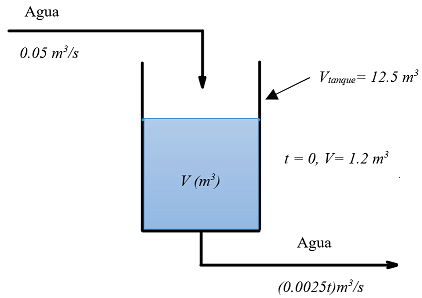

In [ ]:
# Cargar paquetes
import sympy as sp
from sympy import *
import math
init_printing()

In [ ]:
#Declaración de variables

t = sp.symbols('t')
y = sp.Function('V')

# Aquí va la ecuación diferencial a solucionar
Ecuacion = Eq(y(t).diff(), 0.05-0.0025*t)

# Condiciones iniciales
Ci = {y(0):1.2}

#Planteo de ecuaciones sin (Sol_1) y con (Sol_2) valor inicial
Sol_1= dsolve(Ecuacion,y(t))
Sol_2= dsolve(Ecuacion,y(t),ics=Ci)

#Presentación de las ecuaciones resueltas
display(Ecuacion)
display(Sol_1)
display(Sol_2)

d                         
──(V(t)) = 0.05 - 0.0025⋅t
dt                        

                     2         
V(t) = C₁ - 0.00125⋅t  + 0.05⋅t

                  2               
V(t) = - 0.00125⋅t  + 0.05⋅t + 1.2

**Elaboración de la gráfica**

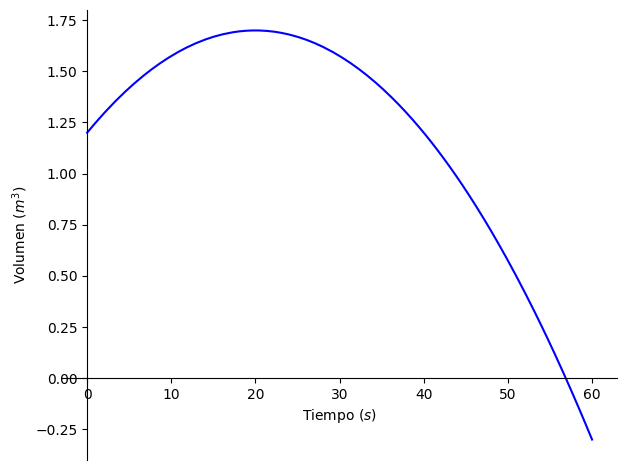

In [ ]:
sp.plot(Sol_2.rhs,(t,0,60), line_color='b',ylabel='Volumen ($m^3$)', xlabel='Tiempo ($s$)')

In [ ]:
Sol_2.subs(t,55.778) # Para evaluar el volumen en un tiempo puntual

V(55.778) = 0.0999183950000004

**Evaluación en forma numérica**

In [ ]:
for i in range (11):
  display(Sol_2.subs(t,i))

V(0) = 1.2

V(1) = 1.24875

V(2) = 1.295

V(3) = 1.33875

V(4) = 1.38

V(5) = 1.41875

V(6) = 1.455

V(7) = 1.48875

V(8) = 1.52

V(9) = 1.54875

V(10) = 1.575

---

**Ejemplo 11.2.2** *Comportamiento transitorio de un reactor con tanque agitado*

Una reaccción en fase líquida con estequiometría $A⟶B$ se lleva a cabo en un reactor continuo de tanque agitado, bien mezclado, de $10.0$ litros. A continuación mostramos un esquema del proceso:

$\hspace{4cm}$ 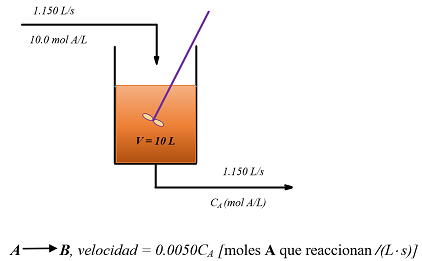
Puede considerarse que la mezcla del reactor es perfecta, de modo que el contenido es uniforme y la concentración de $A$ en la corriente del producto es igual a la que está dentro del tanque. Al principio, el tanque se llena con una solución que contiene $2.00$ $mol A/L$ y después se inician los flujos de entrada y de salida.

1. Escriba un balance para la especie $A$ en el tanque y provea la condición inicial.
2. Calcule $C_{AS}$, la concentración de estado estacionario de $A$ en el tanque (cuyo valor se aproxima como $t$ ⟶ ∞).
3. Dibuje la forma esperada de la gráfica de $C_A$ contra $t$.
4. Despeje $C_A(t)$ en la ecuación de balance, verifique la solución y dibuje la gráfica real de $C_A$ contra $t$.

**Solución**

1. Los moles totales de A en el reactor en cualquier momento son iguales a $(10.0 L)[C_A(mol A/L)]$ = $10.0$ $C_A(mol A)$. Por tanto,

*Acumulación:* $\hspace{2cm}$ $\frac{d(10.0C_A)}{dt}$= $10.0\frac{dC_A}{dt}(\frac{molA}{s})$

*Entradas:*$\hspace{2cm}$ $(1.15\frac{L}{s})\times(\frac{10.0 molA}{L})=11.50 \frac{molA}{s}$

*Salidas:*$\hspace{2cm}$ $(0.150\frac{L}{s})(C_A\frac{molA}{L})=0.150 C_A\frac{molA}{s}$

*Consumo:*$\hspace{2cm}$ $(10 L)[0.0050C_A(\frac{molA}{L·s})]=0.050C_A\frac{molA}{s}$

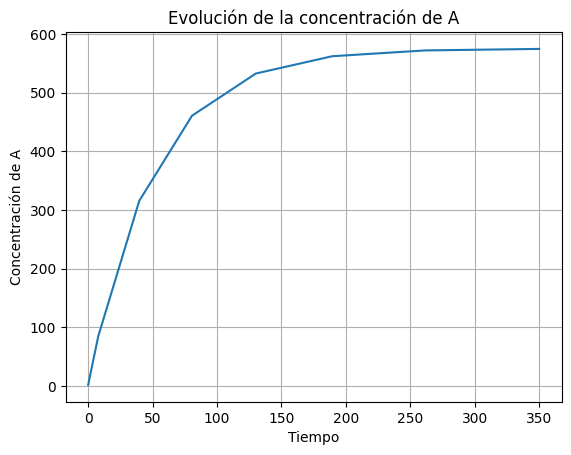

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dCA_dt(t, CA):
    return 11.5 - 0.02*CA

# Valores iniciales
t0 = 0
CA0 = 2

# Solución de la ecuación diferencial
sol = solve_ivp(dCA_dt, [t0, 350], [CA0])

# Graficar
plt.plot(sol.t, sol.y[0])
plt.xlabel('Tiempo')
plt.ylabel('Concentración de A')
plt.title('Evolución de la concentración de A')
plt.grid(True)
plt.show()

Se lleva a cabo una reacción química $A → B$ en un recipiente cerrado y se obtienen los siguientes datos para la concntración de A, $C_A$ (g/L), en función del tiempo, $t(min)$, desde el inicio de la reacción:

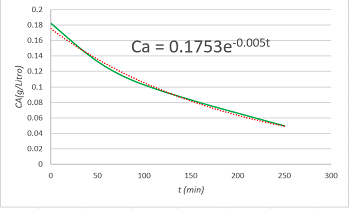

El mecanismo de reacción propuesto predice que $C_A$ y $t$ deben estar relacionadas por la expresión
$ln \frac{C_A-C_{Ae}}{C_{Ao}-C_{Ae}}= - kt$

In [ ]:
#Declaración de variables
from math import e
t = sp.symbols('t')
y = sp.Function('Ca')

# Aquí va la ecuación diferencial a solucionar
Ecuacion = Eq(y(t).diff(), 0.1753*e**(-0.005*t))

# Condiciones iniciales
Ci = {y(0):0.1823}

#Planteo de ecuaciones sin (Sol_1) y con (Sol_2) valor inicial
Sol_1= dsolve(Ecuacion,y(t))
Sol_2= dsolve(Ecuacion,y(t),ics=Ci)

#Presentación de las ecuaciones resueltas
display(Ecuacion)
display(Sol_1)
display(Sol_2)

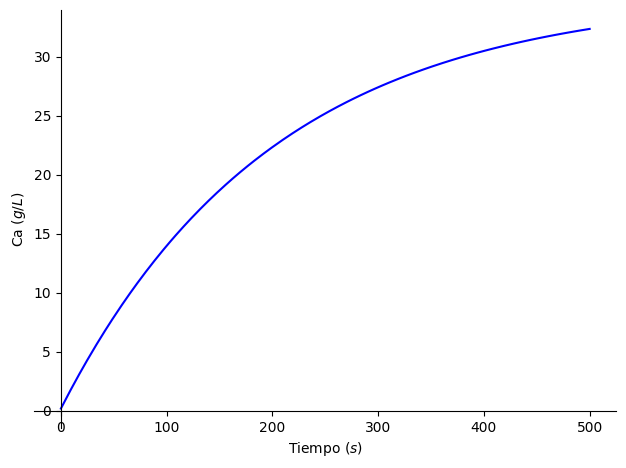

In [ ]:
sp.plot(Sol_2.rhs,(t,0,500), line_color='b',ylabel='Ca ($g/L$)', xlabel='Tiempo ($s$)')

In [ ]:
Sol_2.subs(t,100) # Para evaluar el volumen en un tiempo puntual

Ca(100) = 13.9773350704753